In [1]:
from helpers import * 

from four_complete import *
from four_complete_locations import *
from graph_checks import *

from canonical_order import *

from canonical_order_kant import *
from four_complete_edges import *

In [2]:
bottom_data = get_saved_graph_data("BOTTOM")
side_data = get_saved_graph_data()

graph_data = side_data

In [3]:
f = FourComplete(graph_data)
f.get_boundary_cyle()
f.generate_dividing_indices()
f.divide_boundary_cycle()
f.ensure_no_cips()
f.paths

b = BoundaryCycle(copy.deepcopy(graph_data))
locs = FourCompleteLocations(copy.deepcopy(graph_data), f.boundary, f.paths, b.boundary_line_string)
locs.run()

ic| o: 1, direction: <CardinalDirections.SOUTH: 0>, ix: 10
ic| o: 2, direction: <CardinalDirections.WEST: 1>, ix: 11
ic| o: 3, direction: <CardinalDirections.NORTH: 2>, ix: 12
ic| o: 0, direction: <CardinalDirections.EAST: 3>, ix: 9


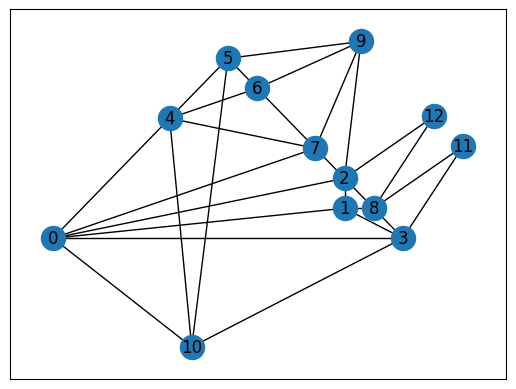

In [4]:
plot_planar(locs.G, locs.embed)

In [5]:
fe=FourCompleteEdges(GraphData(locs.G, locs.embed), b.boundary_line_string )
fe.run()

ic| rad: 0.9001060107014428


None
None


## experimenting

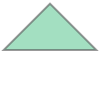

In [6]:
shape = sp.Polygon(b.boundary_line_string)
shape

In [7]:
crossing_edges = []
crossing_lines = []
for e in list(locs.G.edges):
    u, v = get_emedding_coords(locs.embed, e)
    line = sp.LineString((list(u), list(v)))
    if line.crosses(shape):
        crossing_edges.append(e)
        crossing_lines.append(line)
crossing_edges


[(4, 10), (5, 10)]

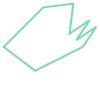

In [8]:
BoundaryCycle(locs.data).boundary_line_string

In [9]:
## remove edges and create a new shape 
temp_G = copy.deepcopy(locs.G)
temp_G.remove_edges_from(crossing_edges)

None


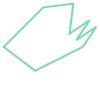

In [10]:
b2 = BoundaryCycle(GraphData(temp_G, locs.embed))
boundary_shape = b2.boundary_line_string
boundary_shape

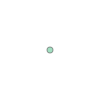

In [11]:
# mid point of the corssing line is what is going to be projected onto the new buffer... 
pt = crossing_lines[0].centroid
pt


In [12]:
buffer = boundary_shape.buffer(0.5)

proj = buffer.boundary.project(pt)
proj_point = buffer.boundary.line_interpolate_point(proj)

In [13]:
# need to get the vector between proj point and the nodes 

In [14]:
crossing_edges[0]


(4, 10)

In [15]:
def create_buffer_projection():

IndentationError: expected an indented block (1681202302.py, line 1)

In [ ]:
def create_curved_edge(edge, buffer_projection):
    node_1, node_2 = (list(t) for t in get_emedding_coords(locs.embed, edge))
    vec1 = vector_between(node_1, proj_point)
    vec2 = vector_between(node_2, proj_point)
    _, rad = angle_between_vectors(vec1, vec2)
    ic(rad)
    pass
